# Required assignment 23.1: Applying PCA

In this assignment, you will explore techniques for denoising images using PCA. You will begin with a simple example involving noisy linear observations to build foundational intuition. Next, you will work with the Fashion-MNIST data set, where selected images will be artificially corrupted with Gaussian noise.

Your task is to apply both PCA and kernel PCA to reconstruct the original images from their noisy counterparts. The assignment includes a set of graded exercises designed to help you evaluate the effectiveness of these methods and reflect on the impact of dimensionality reduction in image denoising.


In [1]:
#Import the necessary libraries
import numpy as np
from PIL import Image
from sklearn.decomposition import PCA, KernelPCA
import sklearn
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error


To build intuition around how PCA can be used for image denoising, let’s begin by examining a simple visual example.

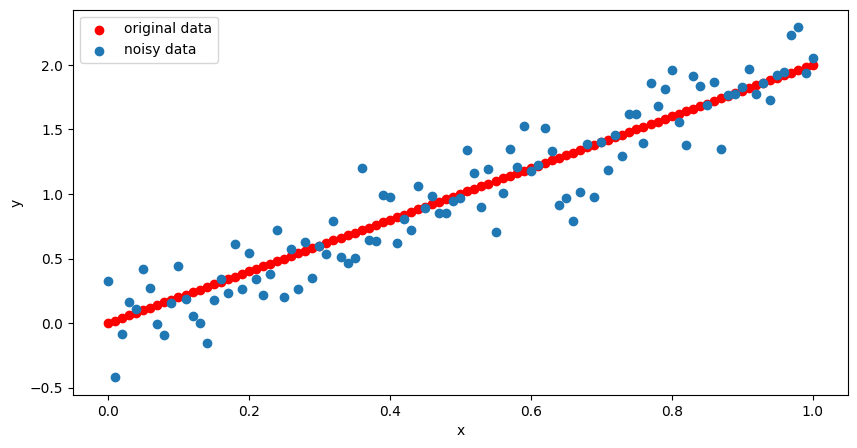

In [2]:
#Original data
x = np.linspace(0, 1, 101)
y = 2 * x

#Add noise to data
y_noisy = y + np.random.normal(0, 0.2, size = x.shape)

fig, ax = plt.subplots(nrows = 1, ncols = 1)
fig.set_figheight(5)
fig.set_figwidth(10)

ax.scatter(x, y, color = 'r', label = 'original data')
ax.scatter(x, y_noisy, label = 'noisy data')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()

The scatter plot illustrates a simple linear relationship between two variables, where the original data points (in red) lie precisely along the line 𝑦 = 2𝑥. The blue points represent the same data after being corrupted by Gaussian noise, causing the data points to deviate from the underlying trend.

This example highlights a key intuition behind PCA-based denoising: if you know that the true structure of the data lies along a one-dimensional subspace (in this case, the line 𝑦 = 2𝑥), you can project the noisy observations back onto that subspace. By doing so, you effectively remove the noise and recover the original signal.

While this is a simplified case, it demonstrates how dimensionality reduction can help isolate meaningful patterns from noisy data. In the next section, you’ll apply this idea to a more complex and realistic data set: Fashion-MNIST.

# Denoisify Fashion-MNIST

You will now try to denoise data from the Fashion-MNIST data set. This is an analogous data set to the MNIST handwritten digits set. However, it is made up of pictures of different types of clothing. It consists of ten different labels: t-shirt (0), trouser (1), pullover (2), dress (3), coat (4), sandal (5), shirt (6), sneaker (7), bag (8) and ankle boot (9). The code below downloads 5,022 images from the data set and splits them into a training data set and a testing data set. You will then visualise the test set.

In [3]:
X = np.genfromtxt('data/fashion-mnist_train.csv', delimiter=',')

Y = X[1:, 0]
X_train = X[21:, 1:]
X_test = X[1:21, 1:]

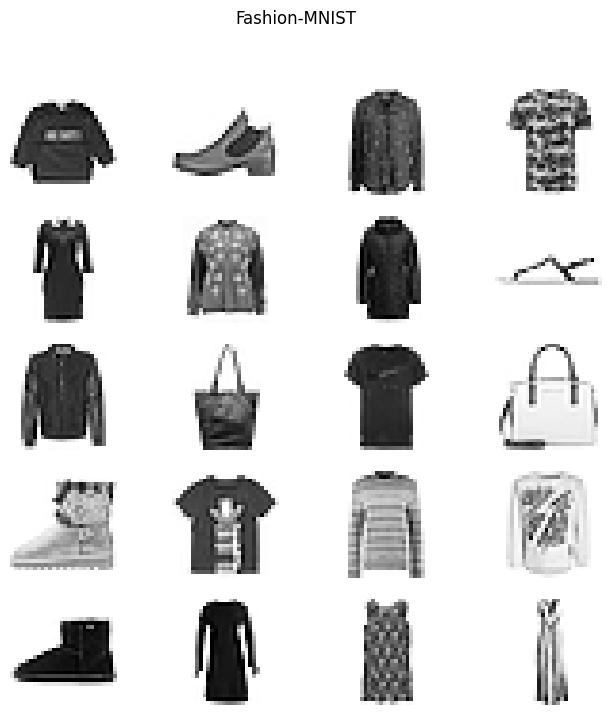

In [4]:
def plot_images(X, title):
    #Use this function to plot the training images
    fig, axs = plt.subplots(nrows=5, ncols=4, figsize=(8, 8))
    for img, ax in zip(X, axs.ravel()):
        ax.imshow(img.reshape((28, 28)), cmap="Greys")
        ax.axis("off")
    fig.suptitle(title, fontsize=12)

plot_images(X_test, 'Fashion-MNIST')

### Question 1:
- In this exercise, you will add Gaussian noise to the  Fashion-MNIST images.

- To add noise to the data set, extend the `X_test* array` with randomly generated data from the `np.random.normal()` function and save the output to `X_noisy`.

- You should pass the following arguments into `np.random.normal()` so that the random data has the required shape:

    - `loc = 0`, 
    - `scale = 40`, 
    - `size = X_test.shape`
- Assign it to `X_noisy`.


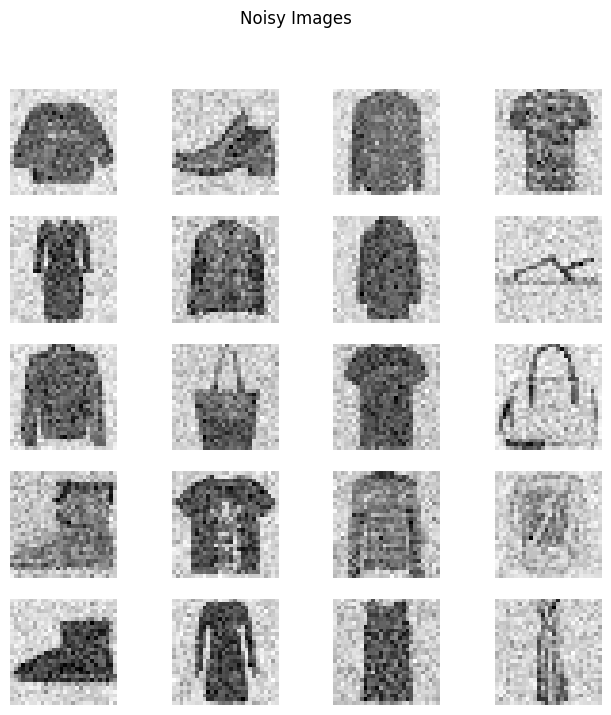

In [5]:
### GRADED CELL
X_noisy = None
np.random.seed(42)  #Ensures reproducibility
# YOUR CODE HERE
#raise NotImplementedError()

X_noisy = X_test + np.random.normal(loc=0, scale=40, size=X_test.shape)

plot_images(X_noisy, 'Noisy Images')

To denoise the data, you will use the training set to *learn* a low-dimensional space that represents your data, which can be used to remove noise from *similar* images. You can see an example [here](https://scikit-learn.org/stable/auto_examples/applications/plot_digits_denoising.html). 

Note that you treat each image as a flat vector with 784 features. Ideally, you want to take greater advantage of known structure in the images. For example, when flattening the image, you lose a lot of spatial structure (a pixel is closely related to all those around it). As an example, [this paper](https://www.researchgate.net/publication/267228169_PCA_based_image_denoising) adds filters to the processes to achieve much better results.

Other examples of exploiting image structure were introduced in Module 21 (Convolutional Neural Networks).

To perform image denoising, you use the training set to learn a low-dimensional representation that captures the essential structure of the data. This learned subspace can then be used to reconstruct similar images while suppressing noise. A practical example of this approach is demonstrated in the   [scikit-learn digits denoising example](https://scikit-learn.org/stable/auto_examples/applications/plot_digits_denoising.html), where clean digit images are used to denoise their corrupted counterparts.


For instance, the paper [PCA-Based Image Denoising](https://www.researchgate.net/publication/267228169_PCA_based_image_denoising) demonstrates how incorporating spatial filters into the PCA pipeline can yield significantly better results. Techniques that preserve spatial context, such as convolutional methods, will be explored in later modules.

The code below trains a PCA model on the clean training set and uses the learned principal components to project the noisy test images into a lower-dimensional space. It then reconstructs the images from this reduced representation.

While this process can effectively suppress noise, the initial reconstructions may appear overly blurred or generic, especially when using a small number of components. As you increase the number of principal components, the reconstructed images begin to recover more distinct features. However, using too many components may reintroduce noise into the output.



### Question 2:
What is the typical behaviour of reconstructed images as the number of principal components increases during PCA-based denoising? Set the value of `ans2` to 'A', 'B', 'C' or 'D' depending on your answer.

A. The images become progressively noisier and less distinguishable.

B. The images remain unchanged regardless of the number of components.

C. The images become clearer and more distinct, but excessive components may reintroduce noise.

D. The images become sharper only if the number of components is below 50.

In [6]:
### GRADED CELL
ans2 = None
# YOUR CODE HERE
#raise NotImplementedError()

ans2 = 'C'


### Question 3:
Given a clean training set `X_train` and a noisy test set `X_noisy`, perform the following steps:

- Fit a PCA model on `X_train` using a specified number of principal components.

- Use the trained model to project `X_noisy` into the PCA space.

- Reconstruct the images from their lower-dimensional representation and store the result in `X_reconstructed`.

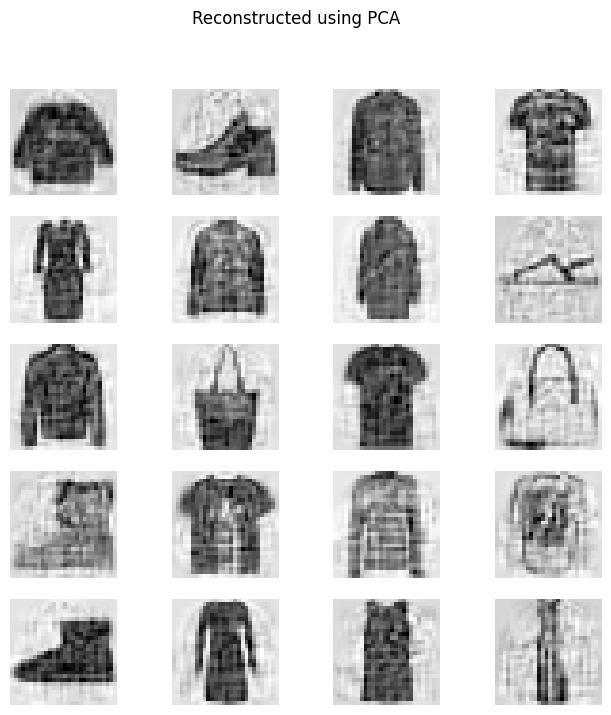

In [7]:
### GRADED CELL
pca = None
n_components = 250
X_reduced = None
X_reconstructed = None
# YOUR CODE HERE
#raise NotImplementedError()

pca = PCA(n_components=n_components, random_state=42)
pca.fit(X_train)

X_reduced = pca.transform(X_noisy)
X_reconstructed = pca.inverse_transform(X_reduced)

plot_images(X_reconstructed, 'Reconstructed using PCA')

### Question 4:
Given a clean training set `X_train` and a noisy test set `X_noisy`, perform the following steps:

- Fit a kernel PCA model on `X_train` using the specified number of components (`n_components`) and enable inverse transformation.

- Use the trained model to project `X_noisy` into the kernel PCA space and store it in `X_reduced_kpca`.

- Reconstruct the images from their lower-dimensional representation and store the result in `X_reconstructed_kpca`.

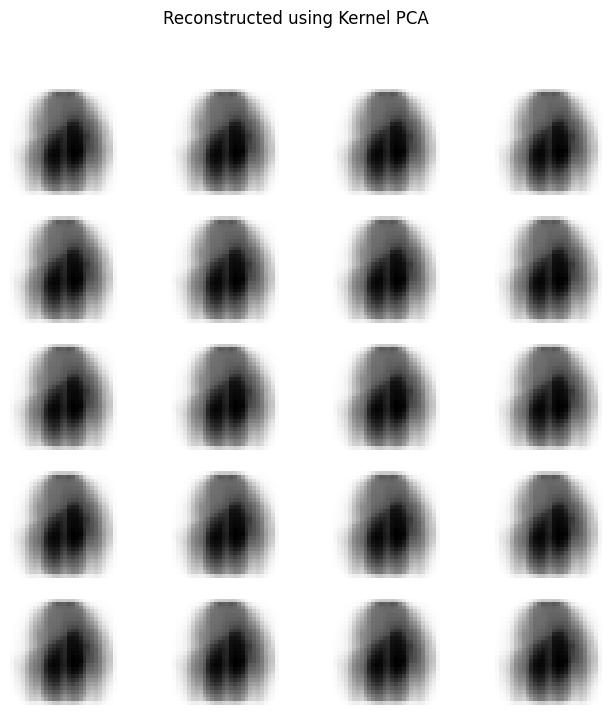

In [8]:
###GRADED CELL
n_components = 350
kpca = None
X_reduced_kpca = None
X_reconstructed_kpca = None
# YOUR CODE HERE
#raise NotImplementedError()

kpca = KernelPCA(
    n_components=n_components,
    kernel='rbf',
    fit_inverse_transform=True,
    gamma=1 / X_train.shape[1]
)
kpca.fit(X_train)

X_reduced_kpca = kpca.transform(X_noisy)
X_reconstructed_kpca = kpca.inverse_transform(X_reduced_kpca)

plot_images(X_reconstructed_kpca, 'Reconstructed using Kernel PCA')

In some cases, certain categories of images may not be reconstructed as effectively as others. If labelled data is available, one way to improve the denoising process is to build a training set using only images from the target class.
By learning a low-dimensional representation specific to that category, the model can better capture its structure and produce more accurate reconstructions.

### Question 5:
After reconstructing the noisy images using PCA or kernel PCA, evaluate how closely the reconstructed images match the original clean test set.

Using the variables `X_test` (clean images) and `X_reconstructed_kpca` (reconstructed images), perform the following steps:

- Compute mean squared error (MSE) between `X_test` and `X_reconstructed_kpca`.

- Store the result in a variable named `mse`.

- Print the value of `mse` to display the reconstruction error.

In [9]:
### GRADED CELL
mse = None
# YOUR CODE HERE
#raise NotImplementedError()

mse = mean_squared_error(X_test, X_reconstructed_kpca)

print(f"MSE: {mse}")



MSE: 5729.876196523965


In this assignment, you explored how PCA and kernel PCA can be used to denoise images by learning low-dimensional representations of visual data. Starting with a simple linear example, you built intuition around projecting noisy data onto meaningful subspaces. You then applied these techniques to the Fashion-MNIST data set, evaluating reconstruction quality and experimenting with different numbers of components. Through this process, you gained insight into the trade-offs between dimensionality reduction and image fidelity and learned how labelled data can further enhance denoising performance.